In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')
import pandas as pd
import random

In [2]:
df=pd.read_csv('iris.data.txt')
df.replace('?',-99999,inplace=True)
df.replace('Iris-setosa',0,inplace=True)
df.replace('Iris-versicolor',1,inplace=True)
df.replace('Iris-virginica',2,inplace=True)
full_data=df.astype(float).values.tolist()

In [3]:
full_data

[[4.9, 3.0, 1.4, 0.2, 0.0],
 [4.7, 3.2, 1.3, 0.2, 0.0],
 [4.6, 3.1, 1.5, 0.2, 0.0],
 [5.0, 3.6, 1.4, 0.2, 0.0],
 [5.4, 3.9, 1.7, 0.4, 0.0],
 [4.6, 3.4, 1.4, 0.3, 0.0],
 [5.0, 3.4, 1.5, 0.2, 0.0],
 [4.4, 2.9, 1.4, 0.2, 0.0],
 [4.9, 3.1, 1.5, 0.1, 0.0],
 [5.4, 3.7, 1.5, 0.2, 0.0],
 [4.8, 3.4, 1.6, 0.2, 0.0],
 [4.8, 3.0, 1.4, 0.1, 0.0],
 [4.3, 3.0, 1.1, 0.1, 0.0],
 [5.8, 4.0, 1.2, 0.2, 0.0],
 [5.7, 4.4, 1.5, 0.4, 0.0],
 [5.4, 3.9, 1.3, 0.4, 0.0],
 [5.1, 3.5, 1.4, 0.3, 0.0],
 [5.7, 3.8, 1.7, 0.3, 0.0],
 [5.1, 3.8, 1.5, 0.3, 0.0],
 [5.4, 3.4, 1.7, 0.2, 0.0],
 [5.1, 3.7, 1.5, 0.4, 0.0],
 [4.6, 3.6, 1.0, 0.2, 0.0],
 [5.1, 3.3, 1.7, 0.5, 0.0],
 [4.8, 3.4, 1.9, 0.2, 0.0],
 [5.0, 3.0, 1.6, 0.2, 0.0],
 [5.0, 3.4, 1.6, 0.4, 0.0],
 [5.2, 3.5, 1.5, 0.2, 0.0],
 [5.2, 3.4, 1.4, 0.2, 0.0],
 [4.7, 3.2, 1.6, 0.2, 0.0],
 [4.8, 3.1, 1.6, 0.2, 0.0],
 [5.4, 3.4, 1.5, 0.4, 0.0],
 [5.2, 4.1, 1.5, 0.1, 0.0],
 [5.5, 4.2, 1.4, 0.2, 0.0],
 [4.9, 3.1, 1.5, 0.1, 0.0],
 [5.0, 3.2, 1.2, 0.2, 0.0],
 [5.5, 3.5, 1.3, 0.2

In [22]:
random.shuffle(full_data)
test_size=0.2
train_set={0:[],1:[],2:[]}#output data
test_set={0:[],1:[],2:[]}#for testing
train_data=full_data[:-int(test_size*len(full_data))]
test_data=full_data[-int(test_size*len(full_data)):]

In [23]:
train_data

[[7.2, 3.2, 6.0, 1.8, 2.0],
 [6.3, 2.8, 5.1, 1.5, 2.0],
 [5.9, 3.2, 4.8, 1.8, 1.0],
 [6.9, 3.2, 5.7, 2.3, 2.0],
 [5.7, 2.5, 5.0, 2.0, 2.0],
 [4.8, 3.4, 1.6, 0.2, 0.0],
 [5.7, 3.8, 1.7, 0.3, 0.0],
 [5.6, 2.5, 3.9, 1.1, 1.0],
 [5.4, 3.9, 1.7, 0.4, 0.0],
 [6.0, 2.2, 4.0, 1.0, 1.0],
 [5.1, 3.8, 1.6, 0.2, 0.0],
 [5.8, 2.7, 4.1, 1.0, 1.0],
 [4.9, 3.1, 1.5, 0.1, 0.0],
 [6.4, 2.8, 5.6, 2.2, 2.0],
 [6.0, 3.0, 4.8, 1.8, 2.0],
 [5.5, 2.3, 4.0, 1.3, 1.0],
 [5.9, 3.0, 5.1, 1.8, 2.0],
 [5.0, 3.3, 1.4, 0.2, 0.0],
 [7.4, 2.8, 6.1, 1.9, 2.0],
 [4.7, 3.2, 1.6, 0.2, 0.0],
 [6.6, 3.0, 4.4, 1.4, 1.0],
 [5.4, 3.7, 1.5, 0.2, 0.0],
 [5.0, 3.6, 1.4, 0.2, 0.0],
 [5.7, 3.0, 4.2, 1.2, 1.0],
 [7.7, 3.0, 6.1, 2.3, 2.0],
 [4.4, 3.0, 1.3, 0.2, 0.0],
 [5.0, 3.5, 1.3, 0.3, 0.0],
 [5.8, 4.0, 1.2, 0.2, 0.0],
 [5.2, 3.4, 1.4, 0.2, 0.0],
 [5.6, 2.7, 4.2, 1.3, 1.0],
 [6.7, 2.5, 5.8, 1.8, 2.0],
 [6.1, 2.8, 4.0, 1.3, 1.0],
 [4.4, 2.9, 1.4, 0.2, 0.0],
 [7.7, 3.8, 6.7, 2.2, 2.0],
 [6.5, 3.0, 5.5, 1.8, 2.0],
 [4.9, 3.1, 1.5, 0.1

In [24]:
test_set

{0: [], 1: [], 2: []}

In [25]:
train_set

{0: [], 1: [], 2: []}

In [26]:
test_data

[[6.5, 3.0, 5.8, 2.2, 2.0],
 [5.4, 3.9, 1.3, 0.4, 0.0],
 [6.7, 3.1, 4.7, 1.5, 1.0],
 [6.1, 3.0, 4.9, 1.8, 2.0],
 [6.1, 3.0, 4.6, 1.4, 1.0],
 [5.2, 2.7, 3.9, 1.4, 1.0],
 [5.8, 2.8, 5.1, 2.4, 2.0],
 [5.7, 2.8, 4.5, 1.3, 1.0],
 [7.1, 3.0, 5.9, 2.1, 2.0],
 [5.4, 3.4, 1.7, 0.2, 0.0],
 [6.2, 2.2, 4.5, 1.5, 1.0],
 [6.7, 3.1, 5.6, 2.4, 2.0],
 [6.5, 3.2, 5.1, 2.0, 2.0],
 [5.6, 2.8, 4.9, 2.0, 2.0],
 [5.0, 2.3, 3.3, 1.0, 1.0],
 [4.9, 2.5, 4.5, 1.7, 2.0],
 [5.4, 3.0, 4.5, 1.5, 1.0],
 [6.0, 3.4, 4.5, 1.6, 1.0],
 [4.9, 3.1, 1.5, 0.1, 0.0],
 [5.1, 3.8, 1.5, 0.3, 0.0],
 [5.8, 2.6, 4.0, 1.2, 1.0],
 [6.4, 3.2, 5.3, 2.3, 2.0],
 [6.2, 2.8, 4.8, 1.8, 2.0],
 [4.4, 3.2, 1.3, 0.2, 0.0],
 [5.7, 4.4, 1.5, 0.4, 0.0],
 [5.1, 3.3, 1.7, 0.5, 0.0],
 [6.8, 3.2, 5.9, 2.3, 2.0],
 [6.7, 3.3, 5.7, 2.5, 2.0],
 [5.5, 2.5, 4.0, 1.3, 1.0]]

In [27]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [28]:
train_set

{0: [[4.8, 3.4, 1.6, 0.2],
  [5.7, 3.8, 1.7, 0.3],
  [5.4, 3.9, 1.7, 0.4],
  [5.1, 3.8, 1.6, 0.2],
  [4.9, 3.1, 1.5, 0.1],
  [5.0, 3.3, 1.4, 0.2],
  [4.7, 3.2, 1.6, 0.2],
  [5.4, 3.7, 1.5, 0.2],
  [5.0, 3.6, 1.4, 0.2],
  [4.4, 3.0, 1.3, 0.2],
  [5.0, 3.5, 1.3, 0.3],
  [5.8, 4.0, 1.2, 0.2],
  [5.2, 3.4, 1.4, 0.2],
  [4.4, 2.9, 1.4, 0.2],
  [4.9, 3.1, 1.5, 0.1],
  [4.6, 3.1, 1.5, 0.2],
  [5.2, 4.1, 1.5, 0.1],
  [5.4, 3.4, 1.5, 0.4],
  [5.5, 4.2, 1.4, 0.2],
  [4.6, 3.2, 1.4, 0.2],
  [4.6, 3.6, 1.0, 0.2],
  [4.8, 3.0, 1.4, 0.3],
  [4.5, 2.3, 1.3, 0.3],
  [4.3, 3.0, 1.1, 0.1],
  [4.7, 3.2, 1.3, 0.2],
  [5.1, 3.5, 1.4, 0.3],
  [5.1, 3.8, 1.9, 0.4],
  [5.0, 3.4, 1.6, 0.4],
  [5.0, 3.2, 1.2, 0.2],
  [5.0, 3.4, 1.5, 0.2],
  [4.6, 3.4, 1.4, 0.3],
  [4.8, 3.0, 1.4, 0.1],
  [4.8, 3.4, 1.9, 0.2],
  [5.1, 3.4, 1.5, 0.2],
  [5.5, 3.5, 1.3, 0.2],
  [5.0, 3.0, 1.6, 0.2],
  [4.9, 3.0, 1.4, 0.2],
  [5.0, 3.5, 1.6, 0.6],
  [5.3, 3.7, 1.5, 0.2],
  [5.2, 3.5, 1.5, 0.2],
  [5.1, 3.7, 1.5, 0.4],
  [4.8, 3.1, 

In [14]:
test_set

{0: [[5.4, 3.9, 1.3, 0.4],
  [4.5, 2.3, 1.3, 0.3],
  [5.7, 4.4, 1.5, 0.4],
  [5.2, 4.1, 1.5, 0.1],
  [4.8, 3.1, 1.6, 0.2],
  [5.0, 3.5, 1.6, 0.6],
  [5.5, 3.5, 1.3, 0.2],
  [5.1, 3.8, 1.6, 0.2]],
 1: [[6.3, 3.3, 4.7, 1.6],
  [6.7, 3.0, 5.0, 1.7],
  [5.5, 2.4, 3.8, 1.1],
  [5.0, 2.0, 3.5, 1.0],
  [6.0, 2.9, 4.5, 1.5],
  [5.6, 3.0, 4.5, 1.5],
  [5.6, 2.5, 3.9, 1.1],
  [5.9, 3.0, 4.2, 1.5]],
 2: [[7.2, 3.0, 5.8, 1.6],
  [6.0, 3.0, 4.8, 1.8],
  [6.8, 3.0, 5.5, 2.1],
  [6.4, 2.8, 5.6, 2.2],
  [5.8, 2.7, 5.1, 1.9],
  [6.9, 3.2, 5.7, 2.3],
  [7.1, 3.0, 5.9, 2.1],
  [6.4, 2.8, 5.6, 2.1],
  [6.3, 3.3, 6.0, 2.5],
  [6.9, 3.1, 5.1, 2.3],
  [6.5, 3.0, 5.2, 2.0],
  [7.7, 2.6, 6.9, 2.3],
  [6.4, 3.2, 5.3, 2.3]]}

In [29]:
def KNN(data,predict,K=4):
    #print(len(data))
    if len(data)>=K:
        print("K is set to a value less than total voting groups!")
    dist=[]
    for group in data:
        for feature in data[group]:
            Euclid_distance=np.linalg.norm(np.array(feature)-np.array(predict))
            dist.append([Euclid_distance,group])
    #print(dist)
    #print(sorted(dist))
    #print(sorted(dist[:K]))
    votes=[i[1] for i in sorted(dist)[:K]]
    #print(votes)
    #print(Counter(votes))
    vote_result=Counter(votes).most_common(1)[0][0]
    return vote_result

In [30]:
correct=0
total=0
for group in test_set:
    for data in test_set[group]:
        vote=KNN(train_set,data,K=7)
        if group==vote:
            correct += 1
        total += 1
print("Accuracy: ", correct/total)

Accuracy:  0.9655172413793104


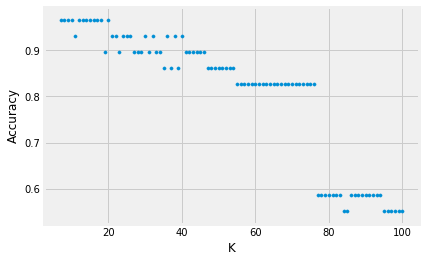

In [31]:
acc=[]
kvalue=[]
for k in range(7,101):
    correct=0
    total=0
    for group in test_set:
        for data in test_set[group]:
            vote=KNN(train_set,data,k)
            if group==vote:
                correct += 1
            total += 1
    acc.append(correct/total)
    kvalue.append(k)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.scatter(kvalue,acc,s=10)
plt.show()